#  Loan Eligibility Prediction Using Classification Mode

In [ ]:
# Importing Required Libraries

# Data Loading & Pre-processing
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc

# Model
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# Data Loading & Pre-processing

In [ ]:
# Loading Dataset
data = pd.read_csv('/content/loan_approval_dataset.csv')

In [ ]:
# Viewing Top 5 Rows or Dataset
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
# Check Data Contains NULL/NaN values
data.isna().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
credit_score,0
residential_assets_value,0
commercial_assets_value,0


In [ ]:
# Checking Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    credit_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value           4269 non-null   int64 
 12  loan_status                4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


# Data Visualization

In [ ]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' credit_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

<Axes: xlabel='count', ylabel='loan_status'>

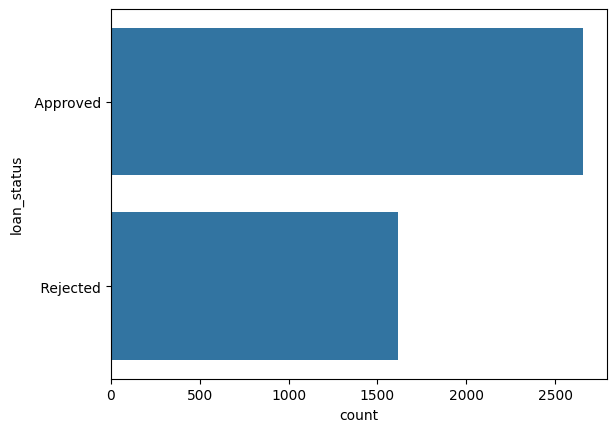

In [ ]:
sns.countplot(data['loan_status'])

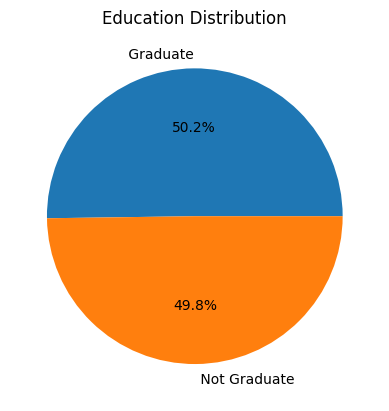

In [ ]:
# pie chart for education
data[' education'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Education Distribution')
plt.ylabel('')
plt.show()

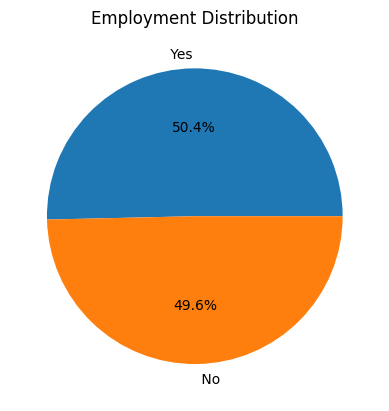

In [ ]:
# pie chart for education
data[' self_employed'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Employment Distribution')
plt.ylabel('')
plt.show()

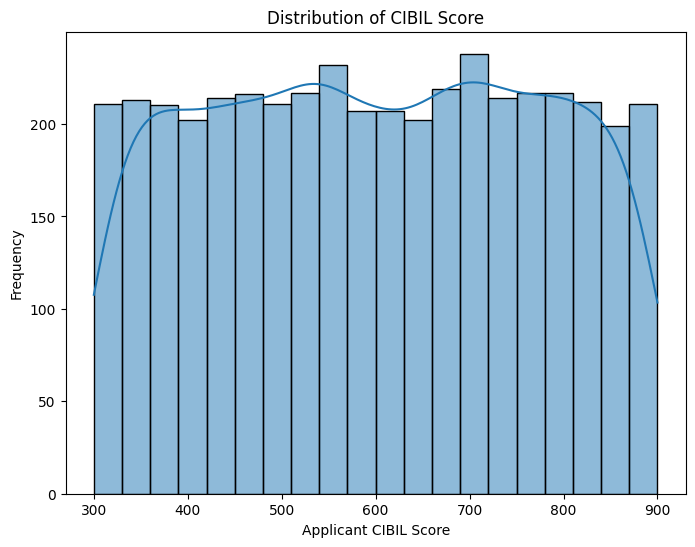

In [ ]:
# Chart of CREDIT Score
plt.figure(figsize=(8, 6))
sns.histplot(data[' credit_score'], bins=20, kde=True)
plt.title('Distribution of CREDIT Score')
plt.xlabel('Applicant CREDIT Score')
plt.ylabel('Frequency')
plt.show()

# Feature Engineering

In [ ]:
# Checking Different Sentiments to map them
data['loan_status'].value_counts()

,count
loan_status,
Approved,2656
Rejected,1613


In [ ]:
# Mapping Loan Status
loan_status_mapping = {' Approved': 1, ' Rejected': 0}
data['loan_status'] = data['loan_status'].map(loan_status_mapping)

In [ ]:
# One hot encoding for object values
data = pd.get_dummies(data)

In [ ]:
# Viewing top 5 rows of dataset
data.head()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,credit_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,education_ Graduate,education_ Not Graduate,self_employed_ No,self_employed_ Yes
0,1,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,1,True,False,True,False
1,2,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,0,False,True,False,True
2,3,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,True,False,True,False
3,4,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,True,False,True,False
4,5,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000,0,False,True,False,True


In [ ]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building

Random Forest Model

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [ ]:
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9789227166276346
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



Gradient Boosting Classifier

In [ ]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

In [ ]:
# Train the model
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)

In [ ]:
print("Gradient Boosting Accuracy:", accuracy_gb)
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9754098360655737
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       318
           1       0.97      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



In [ ]:
# Calculate the false positive rate, true positive rate, and thresholds
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

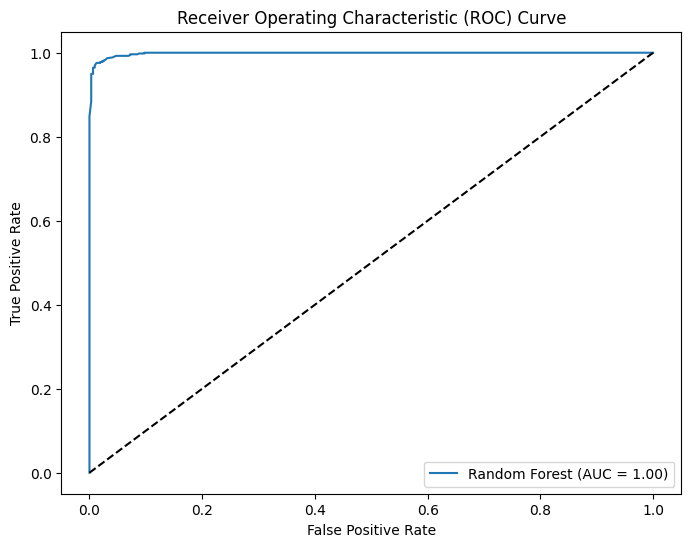

In [ ]:
# Plot the ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

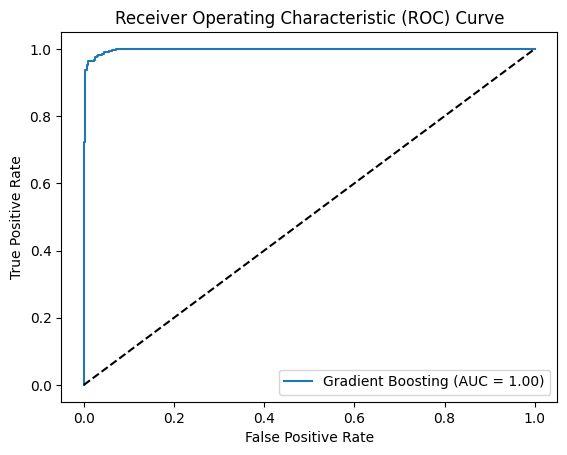

In [ ]:
# ROC curve for Gradient Boosting
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, gb_model.predict_proba(X_test)[:, 1])
roc_auc_gb = auc(fpr_gb, tpr_gb)
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = %0.2f)' % roc_auc_gb)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

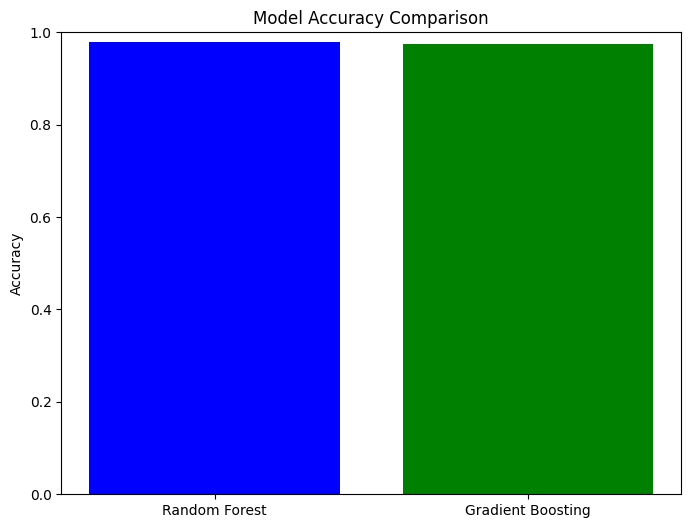

In [ ]:
# Create a bar chart to compare model accuracy
model_names = ['Random Forest', 'Gradient Boosting']
accuracies = [accuracy_rf, accuracy_gb]

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set y-axis limits to 0-1 for accuracy
plt.show()